### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## 1. How do customers engage with and accumulate loyalty points?

In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

import warnings  
warnings.filterwarnings('ignore')  

In [2]:
# Load the CSV file(s) as reviews.

reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.

reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Determine the number of missing values.

reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

No missing values found.

In [4]:
# Explore the data.

print(reviews.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


In [5]:
# Descriptive statistics.

print(reviews.describe())

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


## 1. 2 Drop columns

In [6]:
# Drop unnecessary columns.

reviews_clean = reviews.drop(['language', 'platform'], axis=1)  

# Check the DataFrame.

print(reviews_clean.info())

# View column names.

print(reviews_clean.columns)

# View the df
reviews_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   int64  
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 1.3 Rename columns

In [7]:
# Rename the column headers.

reviews_final = reviews_clean.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)':'spending_score'})

# View column names.

print(reviews_final.columns)
reviews_final.head()

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 1.4 Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.

reviews_final.to_csv('turtle_reviews_final.csv', index=False)


In [9]:
# Import new CSV file with Pandas.

rf = pd.read_csv('turtle_reviews_final.csv')

# View the DataFrame.

print(rf.info())
rf.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 1.5 Linear regression

### 1.5.1 Simple Linear Regression - Single Variables


### A.  Spending Score vs loyalty

In [10]:
# Independent variable.

x_sp = rf['spending_score']

# Dependent variable.

y_sp = rf['loyalty_points']

# Run the OLS test.
model_sp = sm.OLS(y_sp, sm.add_constant(x_sp)).fit()

# View the summary

print(model_sp.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):          2.92e-263
Time:                        12:46:27   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

In [11]:
# Extract the estimated parameters.

print("Estimated Parameters: ")
print(model_sp.params)

# Extract the standard errors.

print("\nStandard Errors:")
print(model_sp.bse)

# Extract the predicted values.

print("Predicted values:") 
print(model_sp.predict())

Estimated Parameters: 
const            -75.052663
spending_score    33.061693
dtype: float64

Standard Errors:
const             45.930554
spending_score     0.814419
dtype: float64
Predicted values:
[1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [12]:
# Set the x coefficient and the constant to generate the regression table.
# Constant coef: -75.0527. x coef: 33.0617. 

# Create the linear equation.
y_pred_sp = -75.0527 + 33.0617 * x_sp

# View the output.
y_pred_sp


0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

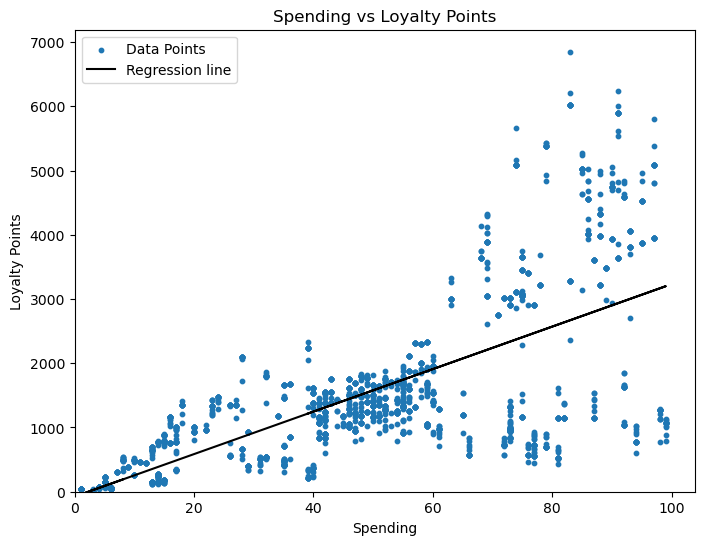

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot graph with regression line.

# Set the size of the chart
plt.figure(figsize=(8, 6))

# Plot the data points with a scatterplot.
plt.scatter(x_sp, y_sp, label='Data Points', s=10)

# Plot the regression line .
plt.plot(x_sp, y_pred_sp, color='black', label='Regression line')

# Add labels, title and legend
plt.xlabel('Spending')
plt.ylabel('Loyalty Points')
plt.title('Spending vs Loyalty Points')
plt.legend(loc='upper left')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

# Save the plot
plt.savefig('Spending vs Loyalty Points.png')

In [14]:
# Predict loyalty points for a given spending_score

New_sp = 70
y_pred_sp = -75.0527 + (33.0617 * New_sp)

# View the output
print("If Spending Score is", New_sp, "the predicted loyalty points are : ", y_pred_sp)  

If Spending Score is 70 the predicted loyalty points are :  2239.2663


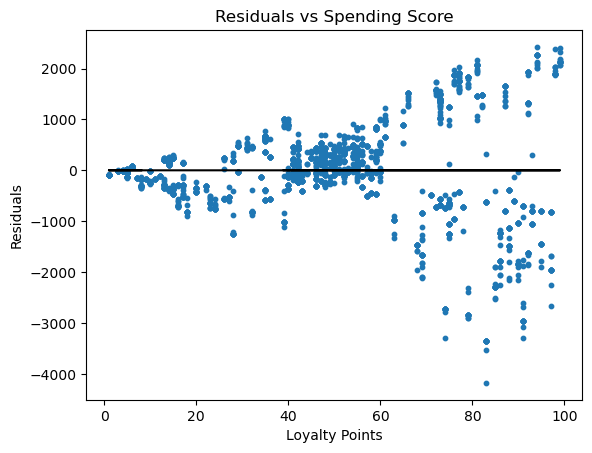

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

plt.scatter(x_sp, model_sp.predict()- y_sp, s=10)
plt.plot(x_sp, y_sp - y_sp, color='black')
plt.title("Residuals vs Spending Score")
plt.xlabel("Loyalty Points")
plt.ylabel("Residuals")
plt.show()
plt.savefig("Residuals vs Spending Score.png")

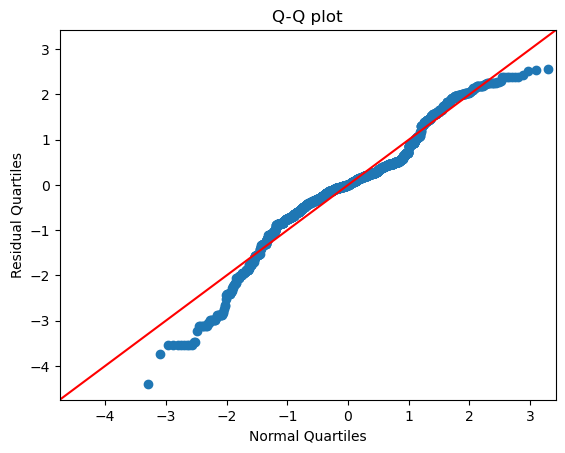

<Figure size 640x480 with 0 Axes>

In [16]:
# Residuals are calcualted
residuals = model_sp.predict() - y_sp  

# Plot the quartiles of the residuals versus the quartiles of the N(0,1)

sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

plt.savefig("Q-Q plot Spending Score.png")

### B. Remuneration vs loyalty

In [17]:
# Independent variable.

x_rem = rf['remuneration']

# Dependent variable.

y_rem = rf['loyalty_points']

# Run the OLS test.
model_rem = sm.OLS(y_rem, sm.add_constant(x_rem)).fit()

# View the summary

print(model_rem.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):          2.43e-209
Time:                        12:46:27   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259   

In [18]:
# Extract the estimated parameters.

print("Estimated Parameters: ")
print(model_rem.params)

# Extract the standard errors.

print("\nStandard Errors:")
print(model_rem.bse)

# Extract the predicted values.

print("Predicted values:") 
print(model_rem.predict())

Estimated Parameters: 
const          -65.686513
remuneration    34.187825
dtype: float64

Standard Errors:
const           52.170717
remuneration     0.977925
dtype: float64
Predicted values:
[ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [19]:
# Set the x coefficient and the constant to generate the regression table.
# Constant coef: -65.6865. x coef: -34.1878, 

# Create the linear equation.
y_pred_rem = -65.6865 + 34.1878 * x_rem

# View the output.
y_pred_rem


0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

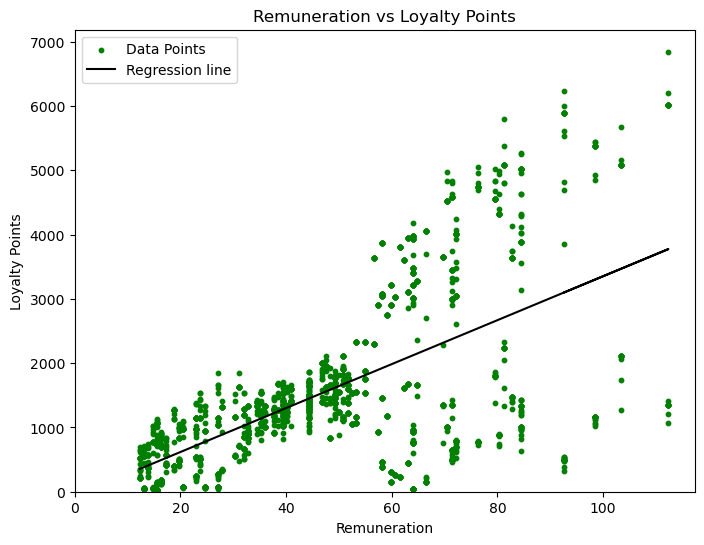

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot graph with regression line.

# Set the size of the chart
plt.figure(figsize=(8, 6))

# Plot the data points with a scatterplot.
plt.scatter(x_rem, y_rem, label='Data Points', s=10, c='green')

# Plot the regression line .
plt.plot(x_rem, y_pred_rem, color='black', label='Regression line')

# Add labels, title and legend
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.title('Remuneration vs Loyalty Points')
plt.legend(loc='upper left')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

plt.savefig("Remuneration vs Loyalty Points.png")

In [21]:
# Predict loyalty points for a given remuneration

New_rem = 44
y_pred_rem = -65.6865 + (34.1878 * New_rem)

# View the output
print("If remuneration is", New_rem, "the predicted loyalty points are : ", y_pred_rem)  

If remuneration is 44 the predicted loyalty points are :  1438.5767


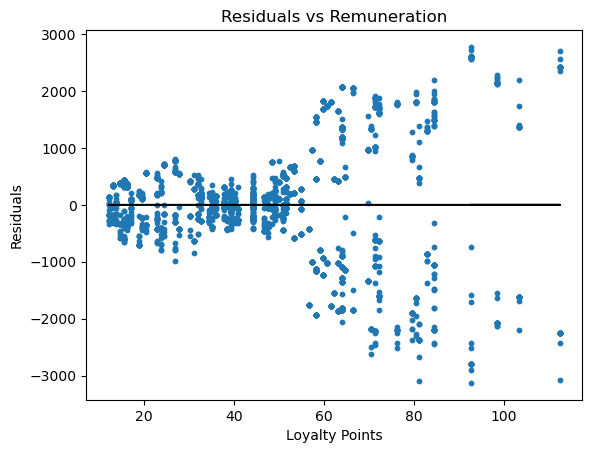

<Figure size 640x480 with 0 Axes>

In [22]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

plt.scatter(x_rem, model_rem.predict()- y_rem, s=10)
plt.plot(x_rem, y_rem - y_rem, color='black')
plt.title("Residuals vs Remuneration")
plt.xlabel("Loyalty Points")
plt.ylabel("Residuals")
plt.show()
plt.savefig("Residuals vs Remuneration.png")

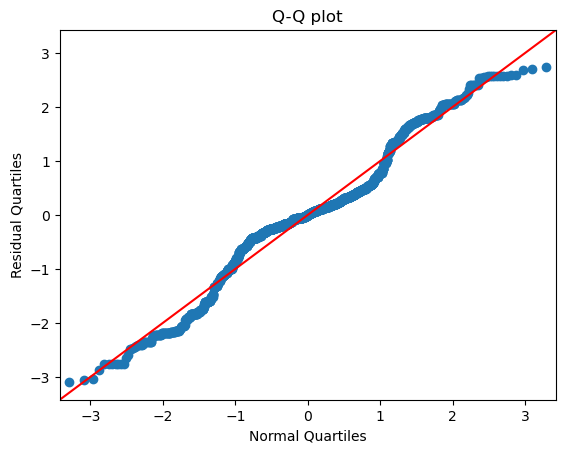

<Figure size 640x480 with 0 Axes>

In [23]:
# Residuals are calcualted
residuals = model_rem.predict() - y_rem  

# Plot the quartiles of the residuals versus the quartiles of the N(0,1)

sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

plt.savefig("Q-Q plot Remuneration.png")

### C. Age vs loyalty

In [24]:
# Independent variable.

x_age = rf['age']

# Dependent variable.

y_age = rf['loyalty_points']

# Run the OLS test.
model_age = sm.OLS(y_age, sm.add_constant(x_age)).fit()

# View the summary

print(model_age.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 04 Mar 2024   Prob (F-statistic):             0.0577
Time:                        12:46:28   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [25]:
# Extract the estimated parameters.

print("Estimated Parameters: ")
print(model_age.params)

# Extract the standard errors.

print("\nStandard Errors:")
print(model_age.bse)

# Extract the predicted values.

print("Predicted values:") 
print(model_age.predict())

Estimated Parameters: 
const    1736.517739
age        -4.012805
dtype: float64

Standard Errors:
const    88.248731
age       2.113177
dtype: float64
Predicted values:
[1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [26]:
# Set the x coefficient and the constant to generate the regression table.
# Constant coef: 1736.5177. x coef: -4.0128. 

# Create the linear equation.
y_pred_age = 1736.5177 + -4.0128 * x_age

# View the output.
y_pred_age


0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

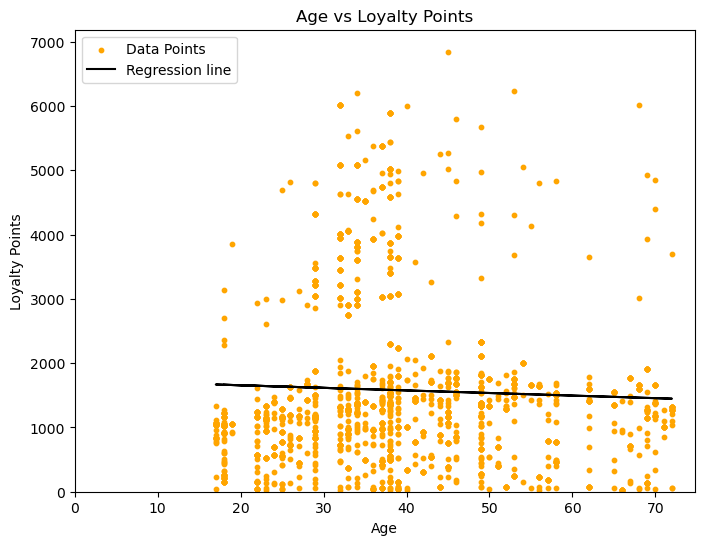

<Figure size 640x480 with 0 Axes>

In [27]:
# Plot graph with regression line.

# Set the size of the chart
plt.figure(figsize=(8, 6))

# Plot the data points with a scatterplot.
plt.scatter(x_age, y_age, label='Data Points', s=10, c='orange')

# Plot the regression line .
plt.plot(x_age, y_pred_age, color='black', label='Regression line')

# Add labels, title and legend
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Age vs Loyalty Points')
plt.legend(loc='upper left')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

plt.savefig('Age vs Loyalty Points.png')

In [28]:
# Predict loyalty points for a given age

New_age = 32
y_pred_age = 1736.5177 + -4.0128 * New_age

# View the output
print("If remuneration is", New_age, "the predicted loyalty points are : ", y_pred_age)  

If remuneration is 32 the predicted loyalty points are :  1608.1081000000001


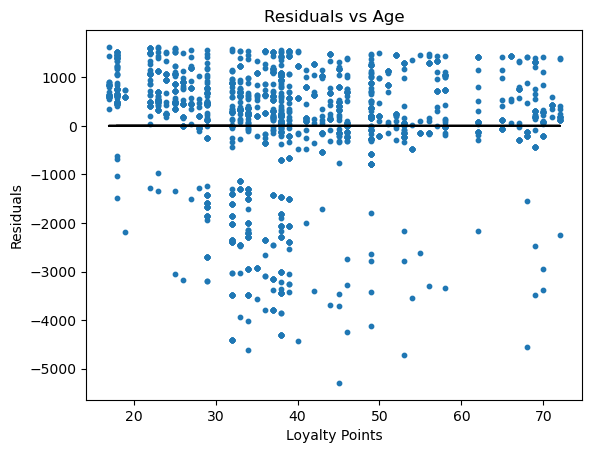

<Figure size 640x480 with 0 Axes>

In [29]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

plt.scatter(x_age, model_age.predict()- y_age, s=10)
plt.plot(x_age, y_age - y_age, color='black')
plt.title("Residuals vs Age")
plt.xlabel("Loyalty Points")
plt.ylabel("Residuals")
plt.show()

plt.savefig('Residuals vs Age.png')

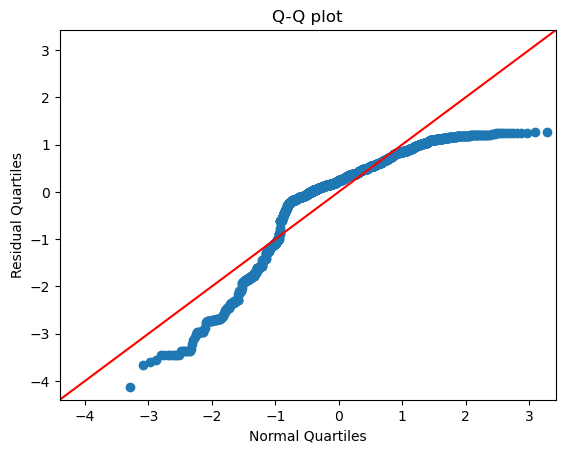

<Figure size 640x480 with 0 Axes>

In [30]:
# Residuals are calcualted
residuals = model_age.predict() - y_age  

# Plot the quartiles of the residuals versus the quartiles of the N(0,1)

sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

plt.savefig('Q-Q plot Age.png')

### Observations and insights - Simple Linear Regression

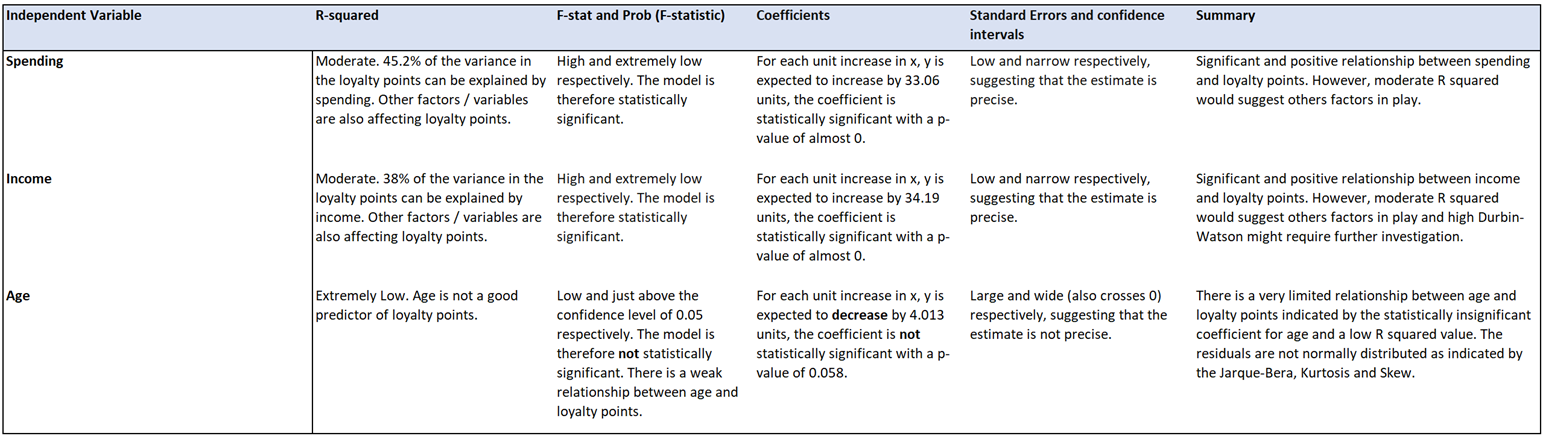

### D. Gender vs loyalty

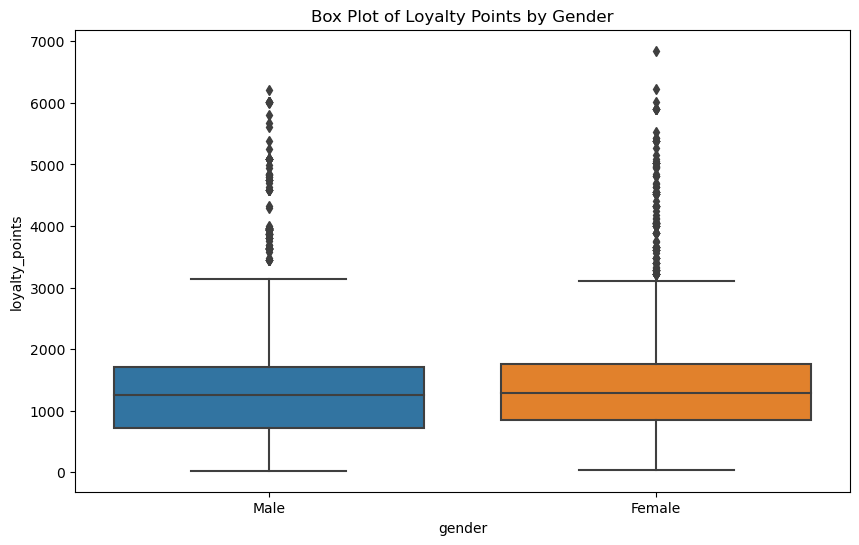

<Figure size 640x480 with 0 Axes>

In [31]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='loyalty_points', data=reviews_final)
plt.title('Box Plot of Loyalty Points by Gender')
plt.show()

plt.savefig('Box Plot of Loyalty Points by Gender.png')

#### Descriptive Statistics

In [32]:
# Descriptive Stats for Gender

ds_gender = reviews_final.groupby('gender')['loyalty_points'].describe()

ds_gender

count         mean          std   min     25%     50%     75%     max
gender                                                                        
Female  1120.0  1601.166964  1251.215501  30.0  842.00  1281.0  1752.0  6847.0
Male     880.0  1548.587500  1323.008802  25.0  724.75  1248.0  1703.0  6208.0

### E. Education vs loyalty

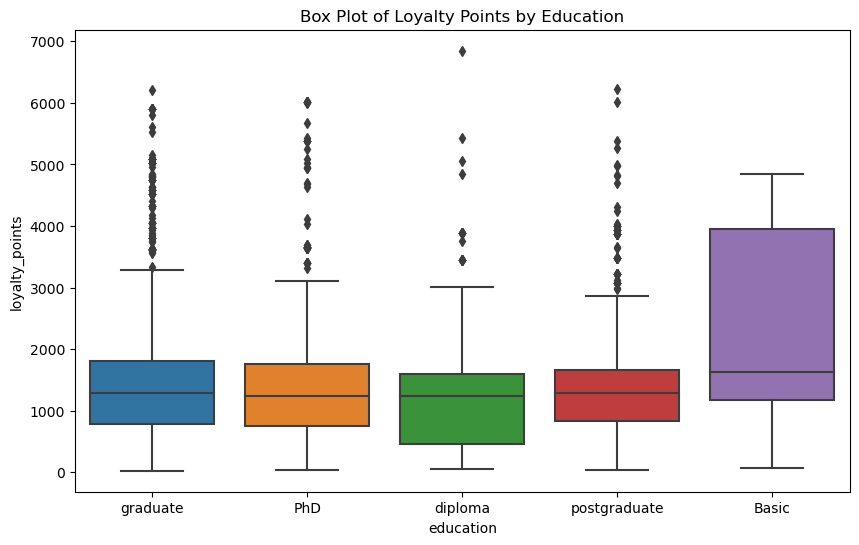

<Figure size 640x480 with 0 Axes>

In [33]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='loyalty_points', data=reviews_final)
plt.title('Box Plot of Loyalty Points by Education')
plt.show()

plt.savefig('Box Plot of Loyalty Points by Education.png')

In [34]:
# Descriptive Stats for Gender

ds_edu = reviews_final.groupby('education')['loyalty_points'].describe()

ds_edu

count         mean          std   min      25%     50%     75%  \
education                                                                      
Basic          50.0  2265.040000  1510.312347  66.0  1177.00  1622.0  3954.0   
PhD           460.0  1499.750000  1274.458561  30.0   752.00  1232.0  1756.0   
diploma       190.0  1336.021053  1162.759075  51.0   459.75  1239.0  1601.0   
graduate      900.0  1666.057778  1341.090733  25.0   780.00  1285.0  1800.0   
postgraduate  400.0  1499.077500  1136.152156  35.0   840.00  1281.0  1668.0   

                 max  
education             
Basic         4837.0  
PhD           6020.0  
diploma       6847.0  
graduate      6208.0  
postgraduate  6232.0

### 1.5.2 Multiple Linear Regression

#### Set the variables

In [35]:
# Define the dependent variable.
y = rf['loyalty_points'] 

# Define the independent variable.

X = rf[['spending_score', 'remuneration', 'age']] 

# OR

#X = rf[['spending_score', 'remuneration']] 

#### Initial multicollinearity check on entire dataframe to assess potential problematic variables

In [36]:
# Check multicollinearity.
x_temp = sm.add_constant(X)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal place.
print(vif.round(1))


   VIF Factor        features
0        20.8           const
1         1.1  spending_score
2         1.0    remuneration
3         1.1             age


All variables show low collinearity and were retained.

#### Fit the model using scikit-learn.

In [37]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

#### Call the predictions for X

In [38]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

#### Check the value of R-squared, the intercept, and the coefficients

In [39]:
# Check the value of R-squared, intercept and coefficients.
print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

R-squared:  0.8399114912748795
Intercept:  -2203.059751307901
Coefficients:


[('spending_score', 34.18319657763366),
 ('remuneration', 34.008385492602486),
 ('age', 11.060658711843365)]

#### Make predictions

In [40]:
# Create a variable 'New_spending' and define it as 77
new_spending = 77

# Create 'New_income' and define it as 52.
new_income = 52  

# Create 'New_age' and define it as 33.

new_age = 33  


# Print the predicted value. 
print ("Predicted Value: \n", mlr.predict([[new_spending, new_income, new_age]])) 

# OR

#print ("Predicted Value: \n", mlr.predict([[new_spending, new_income]]))  

Predicted Value: 
 [2562.48416828]


#### Train and test subsets with multiple linear regression

In [41]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 42)

#### Create a summary using statsmodels

In [42]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  


                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2846.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:46:28   Log-Likelihood:                -12246.
No. Observations:                1600   AIC:                         2.450e+04
Df Residuals:                    1596   BIC:                         2.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2197.0105     58.134    -37.

#### Use Scikit-learn to train the data set for predictive purposes.

In [43]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [44]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_train)) 

Prediction for train set: [1581.73296854  796.88423068 2185.24039458 ... 1789.93373561 1399.81947689
 1437.21562445]


In [45]:
# Call the predictions for X in the test set.
y_pred_test = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_test))  

Prediction for test set: [-4.25709053e+02  2.99343559e+03  2.60003812e+03  1.22401268e+03
  1.53391529e+03  1.79212254e+03  4.18943142e+02  1.38614741e+03
  1.36427501e+03  3.26123743e+03  1.28766114e+03  1.65894130e+03
  1.69575771e+03  2.33734079e+03  1.27743942e+03  1.46204653e+03
  1.69474080e+03  8.09214691e+02 -2.63922829e+01 -9.61682267e+02
  1.55468086e+03  5.11057805e+01  1.64730047e+03  1.29858491e+03
  1.41546811e+03  1.42269406e+03  3.87919648e+03  1.61275266e+03
  1.63341589e+03  1.84791589e+03  8.88818487e+01  6.70246855e+02
  1.00427573e+03  1.71837726e+03  1.66852576e+03  1.28842071e+03
  8.91492831e+02  2.09899697e+03  1.36106930e+03  1.07872564e+03
  1.02910663e+03  1.57353521e+03  1.40597357e+03  4.23039314e+03
  4.27476021e+03 -3.51451403e+02  1.71837726e+03  1.53391529e+03
  1.84020998e+03  1.77547954e+03  1.36186127e+03  8.42143578e+02
  8.92577110e+02 -4.98080057e+02  1.95151882e+03  1.49956756e+03
  3.88942654e+02  4.07828006e+03  1.54909408e+03  3.16017028e+03


### Evaluate the model

In [46]:
# Calculate metrics for both training and test data, create a new df with the results to compare.

# Training data metrics
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
r2_train = mlr.score(x_train, y_train) * 100

# Test data metrics
mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
mse_test = metrics.mean_squared_error(y_test, y_pred_test)
r2_test = mlr.score(x_test, y_test) * 100

# Create results df
data = {
    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'R-squared (%)'],
    'Training Data': [mae_train, mse_train, r2_train],
    'Test Data': [mae_test, mse_test, r2_test]
}

results_df = pd.DataFrame(data)
results_df

Metric  Training Data      Test Data
0  Mean Absolute Error     393.811746     402.235031
1   Mean Squared Error  260165.530533  277188.702332
2        R-squared (%)      84.248918      82.907234

#### Multicollinearity check on training data

In [47]:
# Check multicollinearity.
x_temp_train = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif_train = pd.DataFrame()

# Calculate the VIF for each value.
vif_train['VIF Factor'] = [variance_inflation_factor(x_temp_train.values,
                                               i) for i in range(x_temp_train.values.shape[1])]

# Create the feature columns.
vif_train['features'] = x_temp_train.columns

# Print the values to one decimal points.
print(vif_train.round(1))

   VIF Factor        features
0        20.7           const
1         1.1  spending_score
2         1.0    remuneration
3         1.1             age


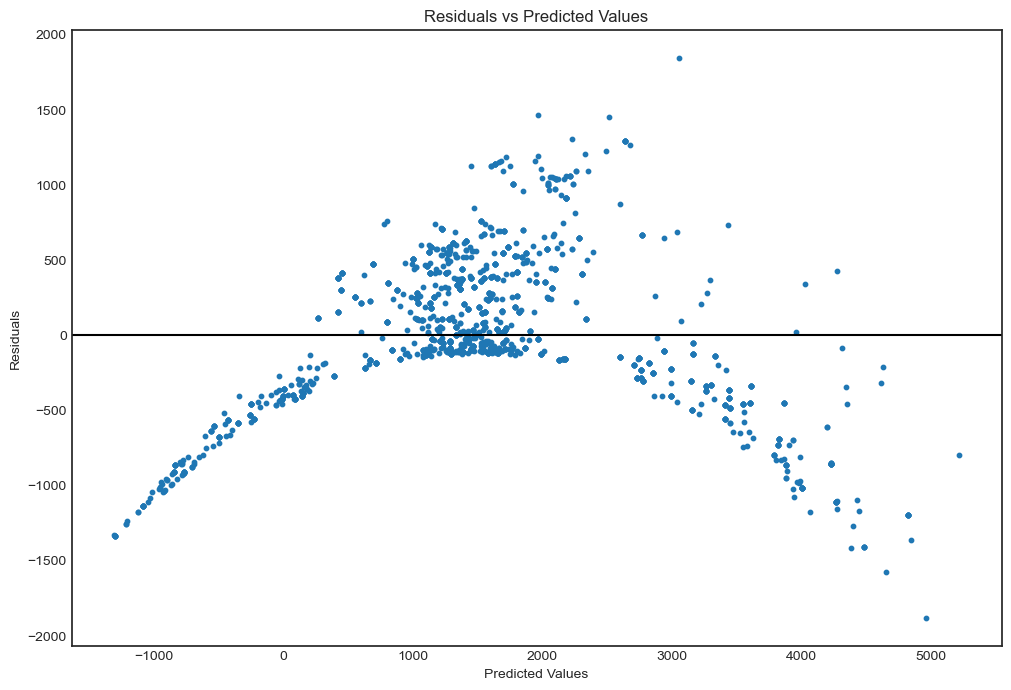

<Figure size 640x480 with 0 Axes>

In [48]:
y_pred_train = mlr.predict(x_train)
residuals = y_pred_train - y_train  

# Plotting the residuals vs. predicted values
plt.style.use('seaborn-white')
plt.figure(figsize=(12, 8))

# Generate residuals
plt.scatter(y_pred_train, residuals, s=10)
plt.axhline(y=0, color='black', linestyle='-')  # Horizontal line at zero for reference
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

plt.savefig('MLR Residuals vs Predicted Values.png')

<Figure size 1200x800 with 0 Axes>

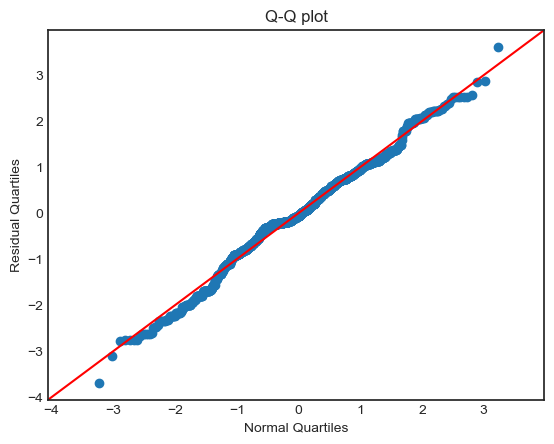

<Figure size 640x480 with 0 Axes>

In [49]:
# Plot the quartiles of the residuals versus the quartiles of the N(0,1)

plt.style.use('seaborn-white')
plt.figure(figsize=(12, 8))

# Generate the Q-Q plot
sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")

plt.show()

plt.savefig('MLR Q-Q plot.png')

## 6. Observations and insights

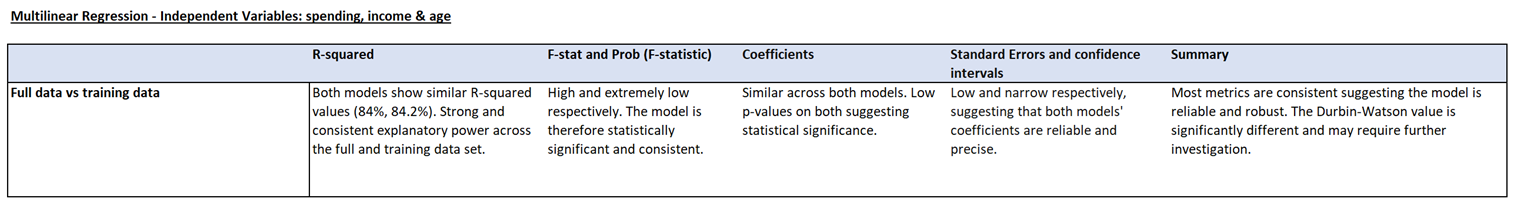






The MAE values are relatively close between the training and test sets. This suggests that the model has a consistent performance in terms of average error per prediction, both on the data it was trained on and on unseen (test) data.

The MSE values are also relatively close, though slightly higher for the test set. This means that the model's overall error (considering the square of the errors) is again consistent across both datasets. 

The R-squared values are quite high for both datasets, indicating that the model explains a significant portion of the variance in the dependent variable (loyalty points). The fact that these values are close (within about 1.34 percentage points) suggests good generalisability of the model.

To conclude, for different variable inputs of spending score, remuneration and age, the model shows good predictive power for loyalty points and generalises well to unseen (test) data.

Possible further investigation could be conducted using a validation dataset.


## 2.0 Making Predictions with Clustering

## 2.1 Load and explore the data

In [50]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [51]:
# Create dataframe df2 with only remuneration and spending_score

df2 = rf[['remuneration', 'spending_score']]

# View DataFrame.

print(df2.info())
df2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [52]:
# Descriptive statistics.

df2.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2.2 Plot

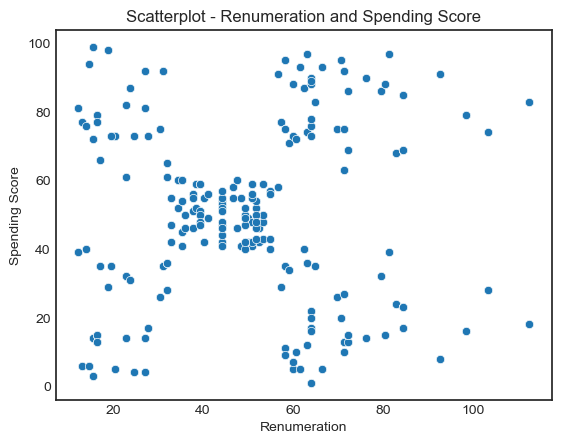

In [53]:
# Create a scatterplot of remuneration and spending_score
sns.set_style("white")
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

# Insert labels and title.
plt.title("Scatterplot - Renumeration and Spending Score")
plt.xlabel("Renumeration")
plt.ylabel("Spending Score")

plt.savefig("Scatter plot Remuneration, Spending Score.png")

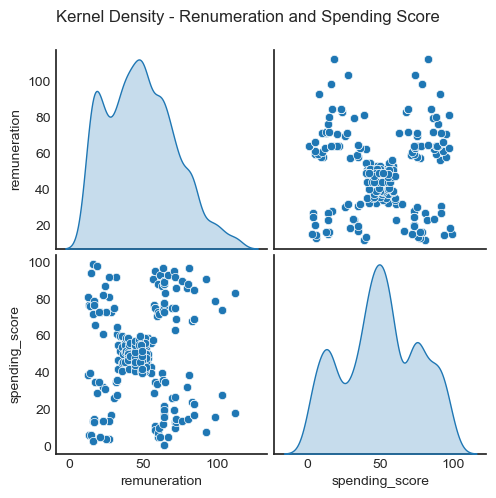

In [54]:
# Create a pairplot for remuneration and spendin_score

x = df2[['remuneration', 'spending_score']]

sns.set_style("white")
sns.pairplot(df2,
             vars=x,
             diag_kind='kde')

# Insert labels and title.
plt.suptitle("Kernel Density - Renumeration and Spending Score", fontsize=12)
plt.subplots_adjust(top=0.90)

plt.savefig("Pair plot Remuneration, Spending Score.png")

## 2.3 Elbow and silhoutte methods

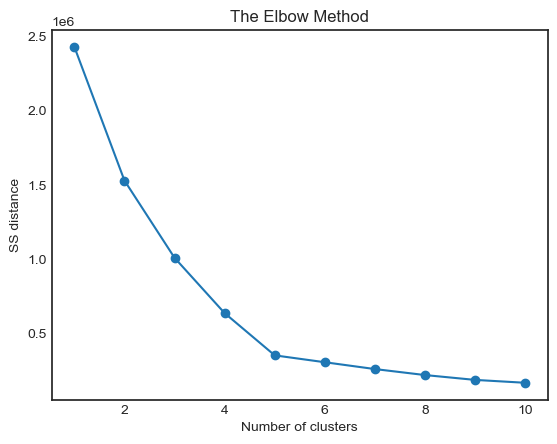

<Figure size 640x480 with 0 Axes>

In [55]:
# Determine the number of clusters: Elbow method.

# Elbow chart to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

plt.savefig("The Elbow Method Remuneration, Spending Score.png")

#### The elbow method indicates a clear 'elbow' at 5 clusters.

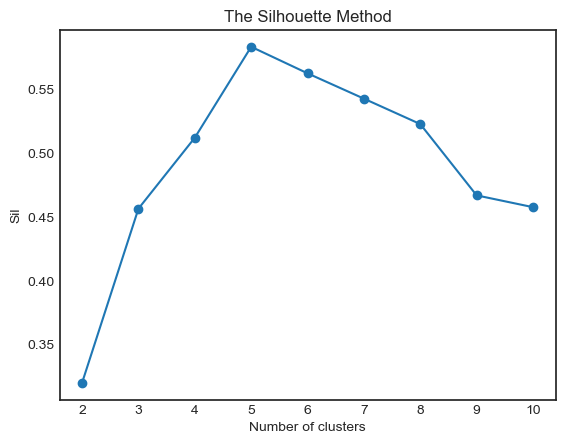

<Figure size 640x480 with 0 Axes>

In [56]:
# Determine the number of clusters: Silhouette method.

sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

plt.savefig("The Silhouette Method Remuneration, Spending Score.png")

#### The silhouette method indicates a clear peak at 5 clusters. The peak value indicates that an object within the cluster is well matched to its own cluster and poorly matched to neighbouring clusters.

## 2.4 Evaluate k-means model at different values of *k*

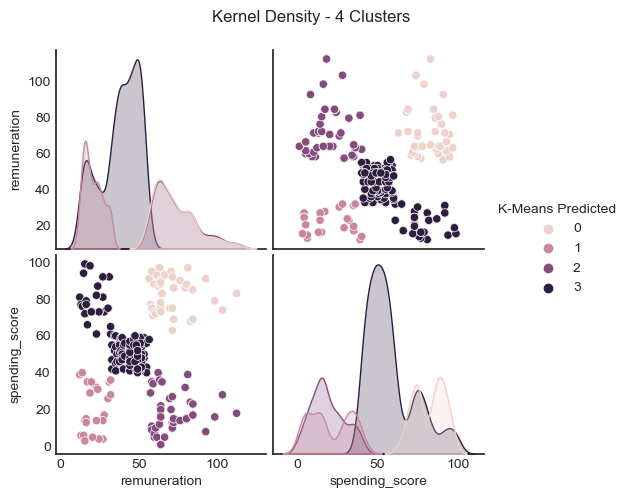

In [57]:
# Use four clusters, k = 4
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.set_style("white")
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Insert labels and title.
plt.suptitle("Kernel Density - 4 Clusters", fontsize=12)
plt.subplots_adjust(top=0.90)



In [58]:
# Check the number of observations per predicted class.
value_counts = x['K-Means Predicted'].value_counts()

vc4 = value_counts.to_frame()

vc4

K-Means Predicted
3               1013
0                356
2                351
1                280

In [59]:
# View the K-Means predicted.
x.head()

remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  3
2         13.12               6                  1
3         13.12              77                  3
4         13.94              40                  1

Text(0.5, 1.0, 'Scatterplot - 4 Clusters')

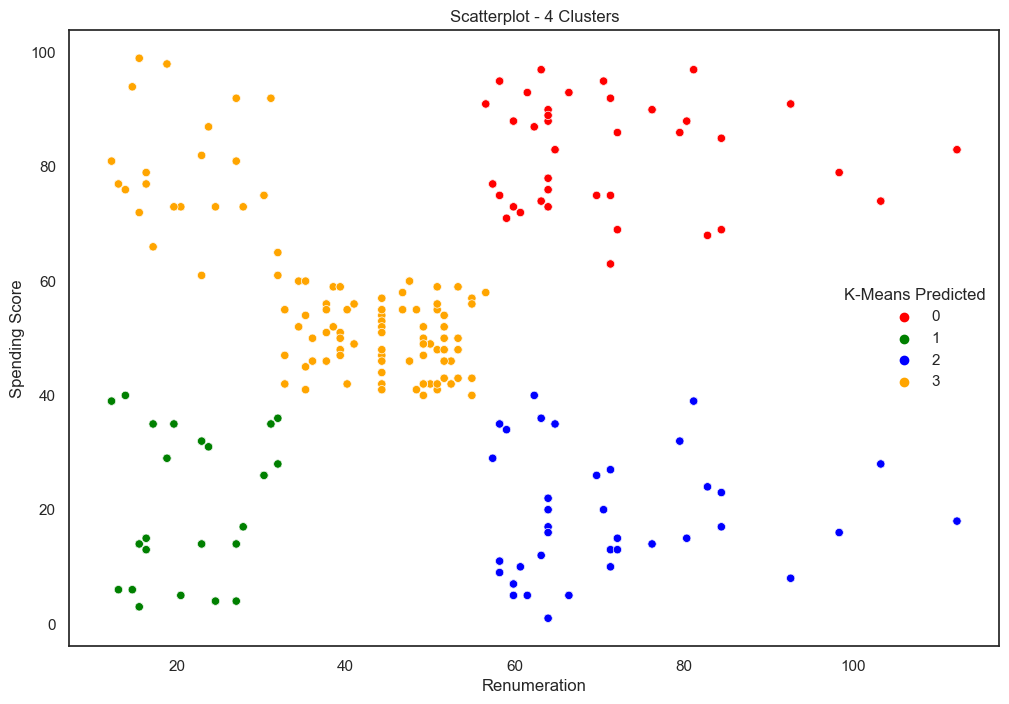

In [60]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.set_style("white")
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'orange'])

# Insert labels and title.
plt.xlabel("Renumeration")
plt.ylabel("Spending Score")
plt.title("Scatterplot - 4 Clusters")

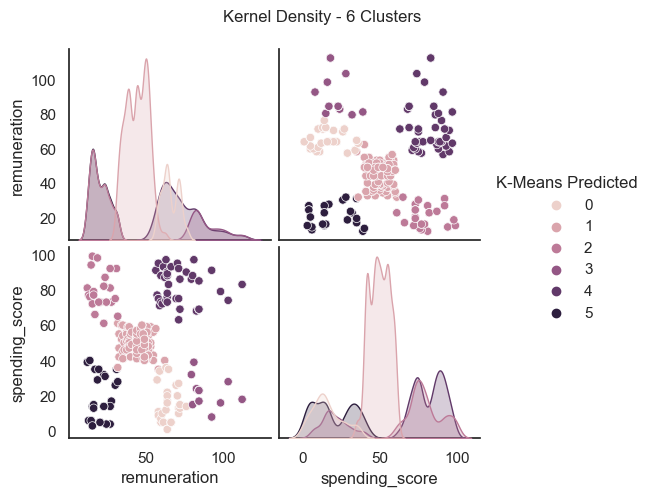

In [61]:
# Use 6 clusters, k = 6
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.set_style("white")
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Insert labels and title.
plt.suptitle("Kernel Density - 6 Clusters", fontsize=12)
plt.subplots_adjust(top=0.90)

In [62]:
# Check the number of observations per predicted class.
value_counts = x['K-Means Predicted'].value_counts()

vc6 = value_counts.to_frame()

vc6

K-Means Predicted
1                767
4                356
5                271
2                269
0                214
3                123

In [63]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  5
1         12.30              81                  2
2         13.12               6                  5
3         13.12              77                  2
4         13.94              40                  5


Text(0.5, 1.0, 'Scatterplot - 6 Clusters')

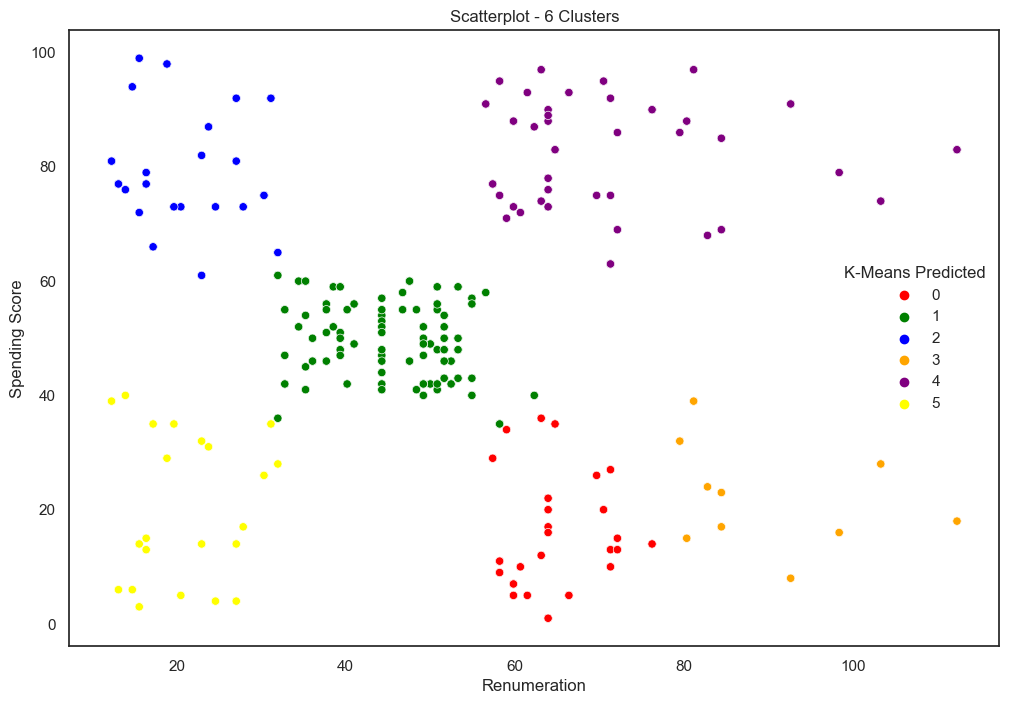

In [64]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.set_style("white")
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'orange', 'purple', 'yellow'])

# Insert labels and title.
plt.xlabel("Renumeration")
plt.ylabel("Spending Score")
plt.title("Scatterplot - 6 Clusters")


## 2.5 Fit final model and justify your choice

### Fit the model using k=5 as indicated by the Elbow and Silhouette methods.

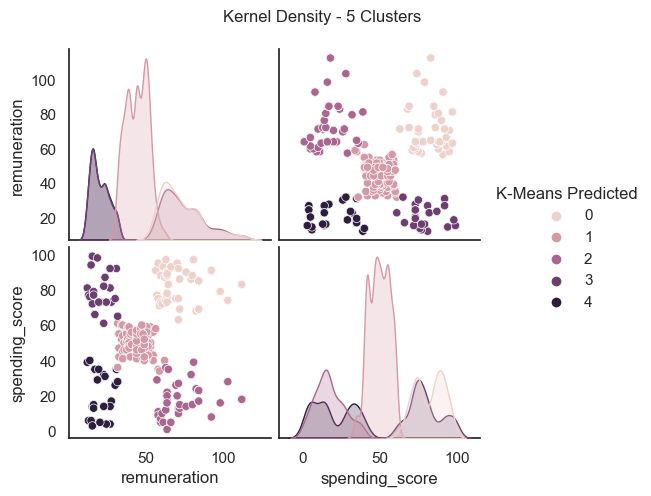

In [65]:
# Apply the final model
# Use 5 clusters, k = 5
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.set_style("white")
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Insert labels and title.
plt.suptitle("Kernel Density - 5 Clusters", fontsize=12)
plt.subplots_adjust(top=0.90)

In [66]:
# Check the number of observations per predicted class.

value_counts = x['K-Means Predicted'].value_counts()

vc5 = value_counts.to_frame()

vc5

K-Means Predicted
1                774
0                356
2                330
4                271
3                269

In [67]:
# View the K-Means predicted dataframe.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


## 2.6 Plot and interpret the clusters

Text(0.5, 1.0, 'Scatterplot - 5 Clusters')

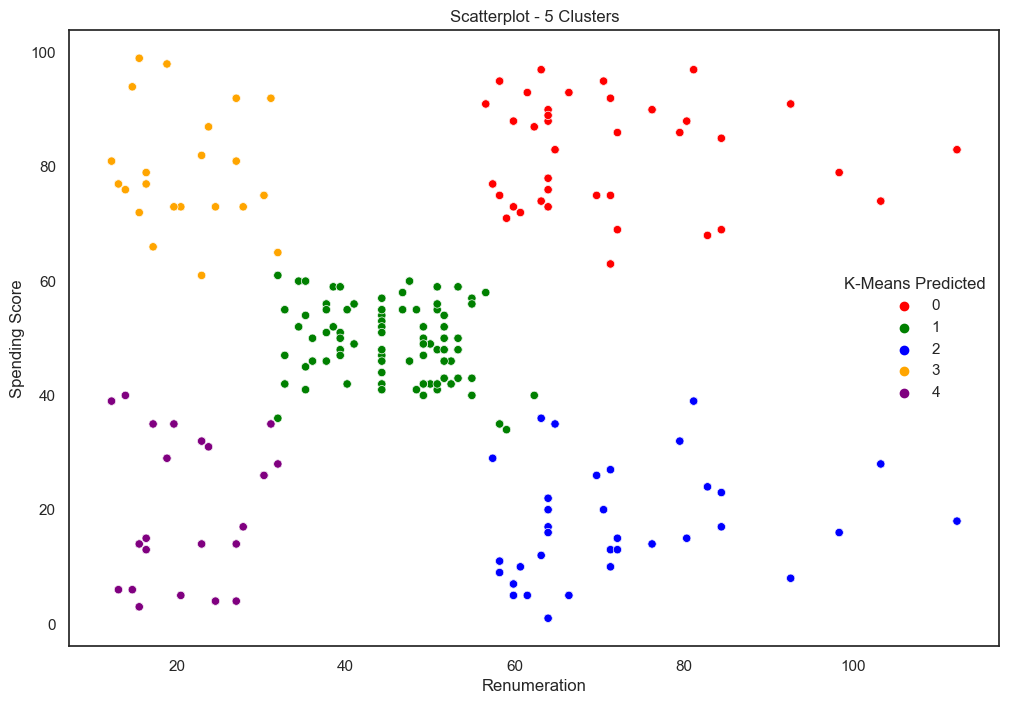

In [68]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.set_style("white")
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'orange', 'purple'])

# Insert labels and title.
plt.xlabel("Renumeration")
plt.ylabel("Spending Score")
plt.title("Scatterplot - 5 Clusters")

## 2.7 Observations and Insights



### The customers can be categorised as follows.
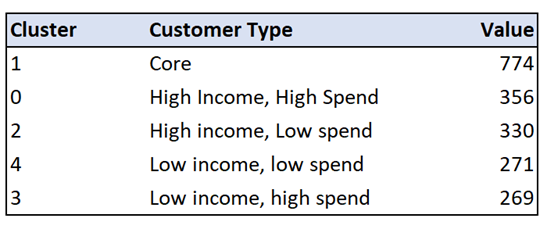

The core group in the centre represents the largest cluster of customers with a 774 value count. The high-income groups are evenly distributed between high and low spend as are the low-income groups which represent the smallest clusters within Turtle’s customer group.

2.7	Observations and Insights
Specific actions could be orchestrated to target each individual customer category with regards to marketing strategies, product customisation, customer relationship management, growth potential and revenue maximisation.

Core

The largest cluster, this group represents the most common combination of income and spending patterns among Turtle’s customers. With moderate income and spending levels, but the most numerous, understanding the characteristics of this group is key since they form a significant portion of Turtle’s customer base.

High Income, High Spend
The second largest customer category. Potential Opportunities:
- Marketing: Targeted with premium products and exclusive offers.
- Product Customisation: Focus on more luxury products.
- Customer relationship Management: personalised services and exclusivity.

High Income, Low Spend
- Perhaps low frequency purchasers of high value products.
- Identifying high-income, low-spending customers can be an opportunity to introduce products or services that might appeal to this segment, thereby potentially increasing their spending.
- Growth focus category. Potential revenue maximization opportunities.

Low Income, High Spend
- Marketing: These customers may be more receptive to budget-friendly deals, promotional offers.
- Customise for more economical options.
- Receptive to loyalty programs and cost-saving tips.
- Potential credit risks associated with high spenders in relation to income.

Low Income, Low Spend
- Possible inducement to spend more through targeted marketing of budget friendly options and promotional offers.
- Receptive to loyalty programs and cost-saving tips.


# 

# 3.0 Analysing Customer Sentiments with Reviews and Summaries


## 3.1 Load and explore the data

In [69]:
# Import all the necessary packages.
# Install TextBlob.

import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from scipy.stats import norm
from textblob import TextBlob

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alasd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alasd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
# Load the data set as df3.

df3 = rf[['review', 'summary']]

# View DataFrame.

df3.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [71]:
# Explore data set.

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [72]:
# Determine if there are any missing values.

df3.isna().sum()

review     0
summary    0
dtype: int64

There are no missing values

## 3.2 Prepare the data for NLP

### Change to lower case and join the elements in each of the columns respectively (review and summary)

In [73]:
# Review: Change all to lower case and join with a space.

df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.

df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [74]:
# Summary: Change all to lower case and join with a space.

df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.

df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### Replace punctuation in each of the columns respectively (review and summary)

In [75]:
# Replace all the punctuations in review column.

df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.

df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [76]:
# Replace all the puncuations in summary column.

df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.

df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

###  Drop duplicates in both columns

In [77]:
# Drop duplicates in both columns.

df3 = df3.drop_duplicates(subset=['review', 'summary'])

df3.reset_index(inplace=True)
df3.head()

# View DataFrame.

print(df3.shape)
df3

(1961, 3)


index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1956      the perfect word game for mixed ages with mom  
1957                                          super fun  
1958                                         great game  
1959                                         four stars  
1960                                     love this game  

[1961 rows x 3 columns]

## Tokenise and Remove Stopwords and non alphanumeric items

In [78]:
# Create new DataFrame (copy DataFrame).

df4 = df3

# View DataFrame.

df4

index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1956      the perfect word game for mixed ages with mom  
1957                                          super fun  
1958                                         great game  
1959                                         four stars  
1960                                     love this game  

[1961 rows x 3 columns]

In [79]:
# Apply tokenisation to both columns.

df4['review_tokens'] = df4['review'].apply(word_tokenize)
df4['summary_tokens'] = df4['summary'].apply(word_tokenize)

df4.head()



index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       review_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      summary_tokens  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

### The following word clouds were created in accordance with the assignment questions. However, prior to removal of stopwords, it provides little practical utility. Similarly, the frequency distribution was performed "pre-removal of stopwords".

In [80]:
# Review: Create a word cloud.

# Create an empty string variable for review.
all_review = ''
for i in range(df4.shape[0]):
    # Add each comment.
    all_review = all_review + df4['review'][i]

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review) 

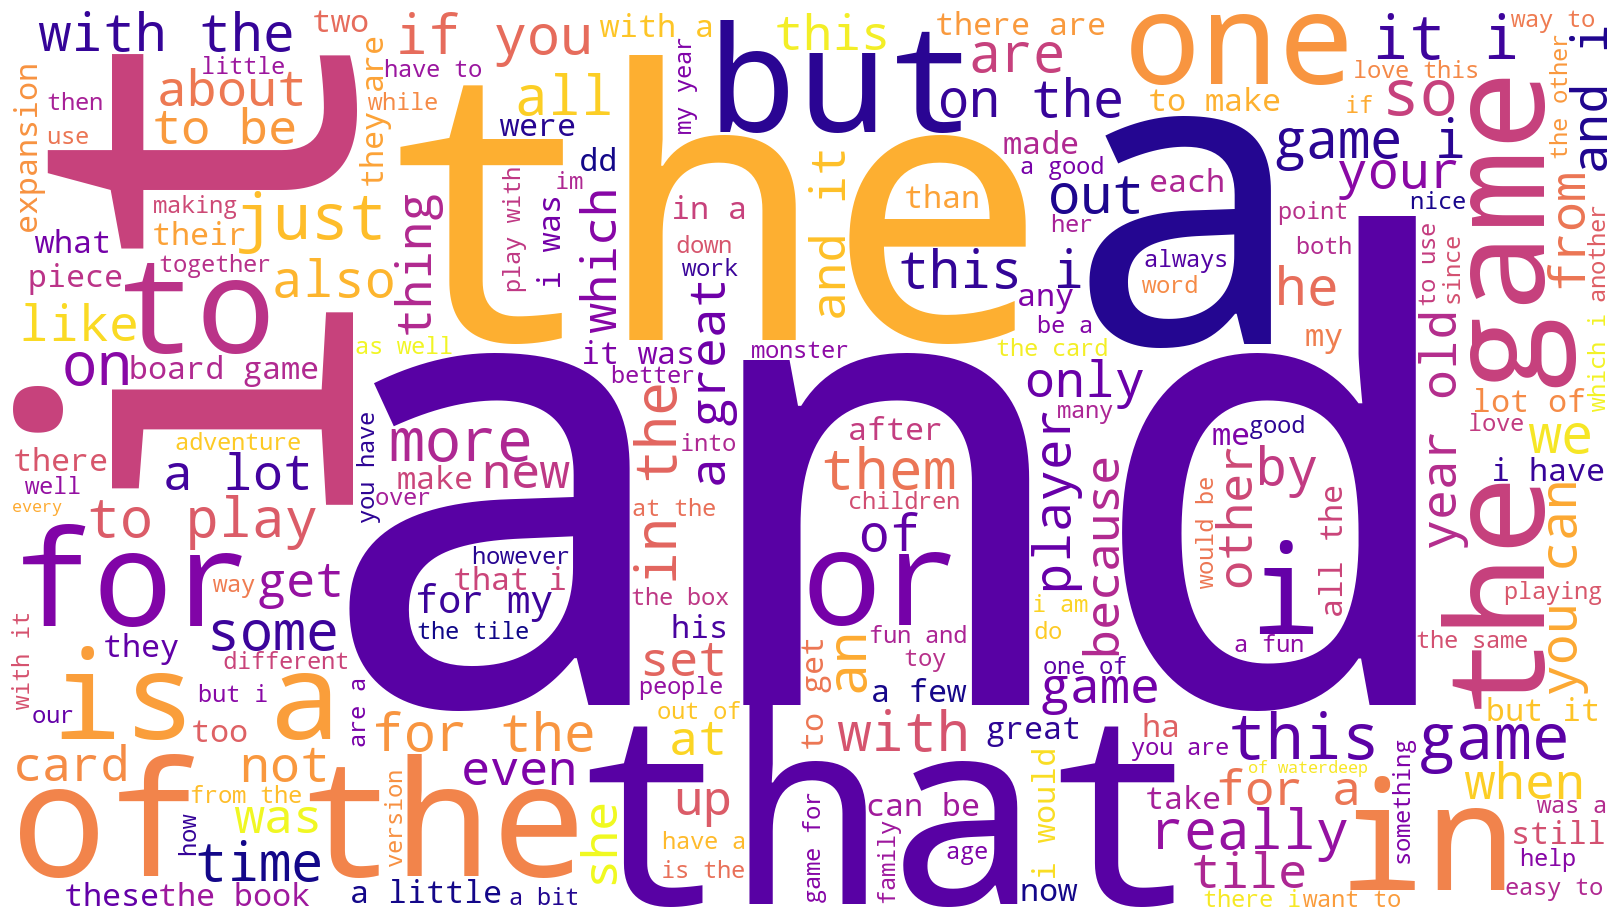

<Figure size 1200x800 with 0 Axes>

In [81]:
# Review: Plot the WordCloud image.
                
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

plt.savefig("Word Cloud Reviews.png")

In [82]:
# Summary: Create a word cloud.

# Create an empty string variable for summary.
all_summary = ''
for i in range(df4.shape[0]):
    # Add each comment.
    all_summary = all_summary + df4['summary'][i]

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

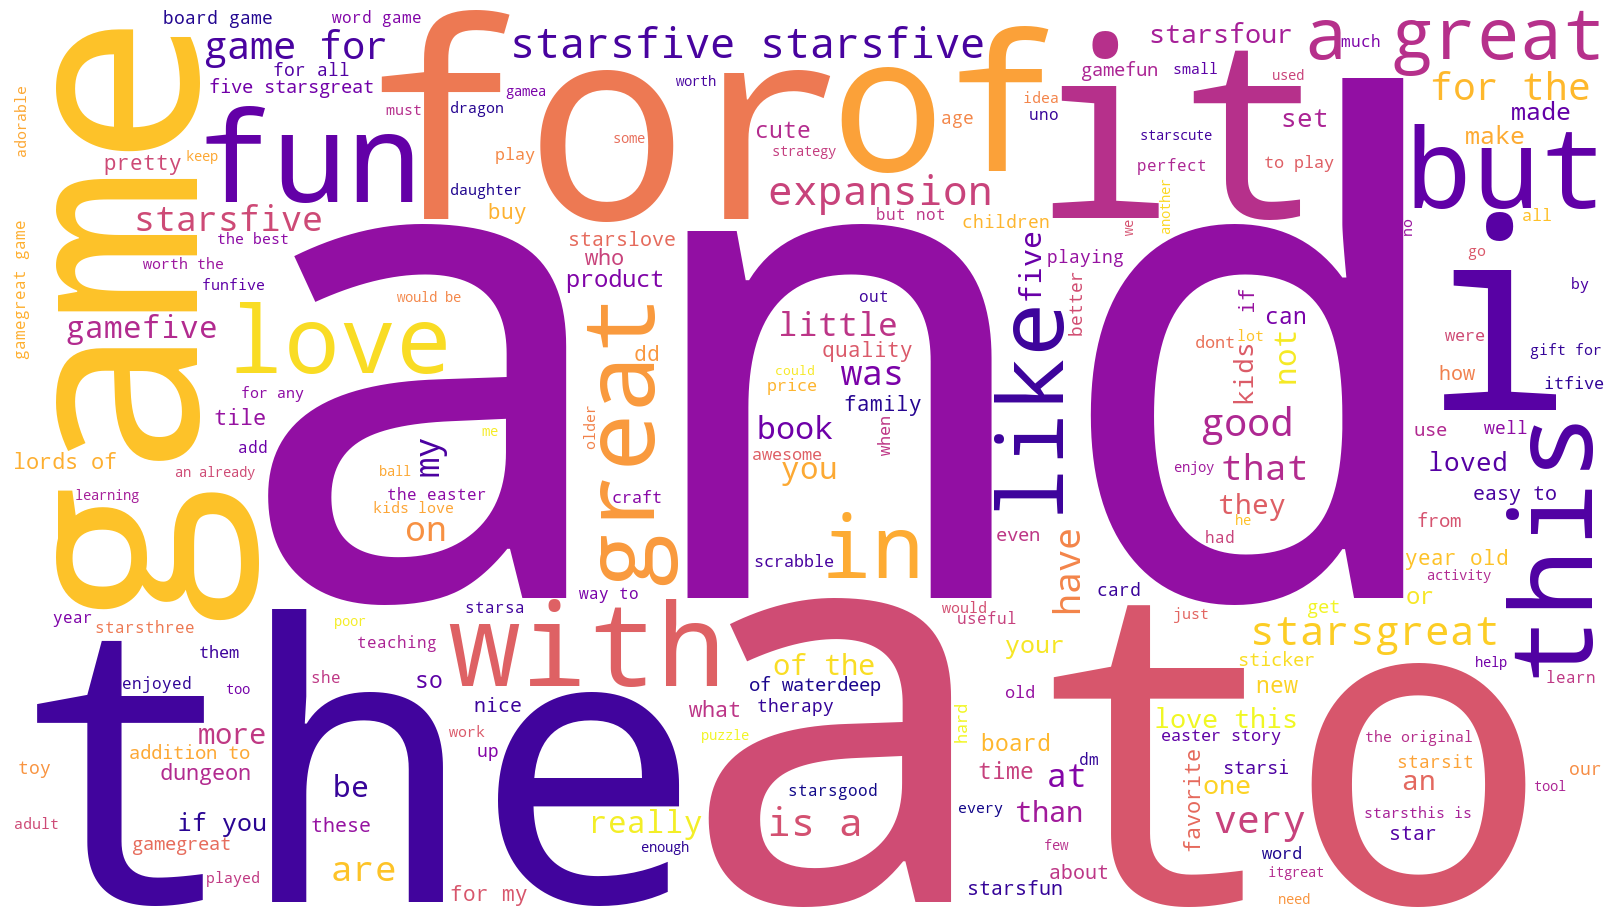

In [83]:
# Summary: Plot the WordCloud image.
                 
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### Frequency distribution and polarity
### Create frequency distribution

In [84]:
# Determine the frequency distribution review

# Define an empty list of tokens.
all_review_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_review_tokens = all_review_tokens + df4['review_tokens'][i]

fdist_review = FreqDist(all_review_tokens )

# Preview data.
fdist_review

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [85]:
# Determine the frequency distribution summary

# Define an empty list of tokens.
all_summary_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_summary_tokens = all_summary_tokens + df4['summary_tokens'][i]

fdist_summary = FreqDist(all_summary_tokens )

# Preview data.
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

###  Remove alphanumeric characters and stopwords

In [86]:
# Delete all the NON alphanum.

review_tokens = [word for word in all_review_tokens if word.isalnum()]
summary_tokens = [word for word in all_summary_tokens if word.isalnum()]

In [87]:
# Remove all the stopwords in review

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
review_tokens2 = [x for x in review_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
review_tokens2_string = ''

for value in review_tokens:
    # Add each filtered token word to the string.
    review_tokens2_string = review_tokens2_string + value + ' '
    

In [88]:
# Remove all the stopwords in summary

# Create a filtered list of tokens without stopwords.
summary_tokens2 = [x for x in summary_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
summary_tokens2_string = ''

for value in summary_tokens:
    # Add each filtered token word to the string.
    summary_tokens2_string = summary_tokens2_string + value + ' '



## 3.3 Frequency distribution and word clouds post removal of stopwords and non alphanumeric items
### Create frequency distribution

In [89]:
# Frequency distribution for the words without stopwords in Review

fdist_review = FreqDist(review_tokens2)

# Preview the frequency distribution
print(fdist_review.most_common(15)) 


[('game', 1671), ('great', 580), ('fun', 552), ('one', 530), ('play', 502), ('like', 414), ('love', 323), ('really', 319), ('get', 319), ('cards', 301), ('tiles', 297), ('time', 291), ('good', 289), ('would', 280), ('book', 273)]


In [90]:
# Frequency distribution for the words without stopwords in Summary

fdist_summary = FreqDist(summary_tokens2)

# Preview the frequency distribution
print(fdist_summary.most_common(15)) 

[('stars', 427), ('five', 342), ('game', 319), ('great', 295), ('fun', 218), ('love', 93), ('good', 92), ('four', 58), ('like', 54), ('expansion', 52), ('kids', 50), ('cute', 45), ('book', 43), ('one', 38), ('awesome', 36)]


### Create wordclouds without stopwords

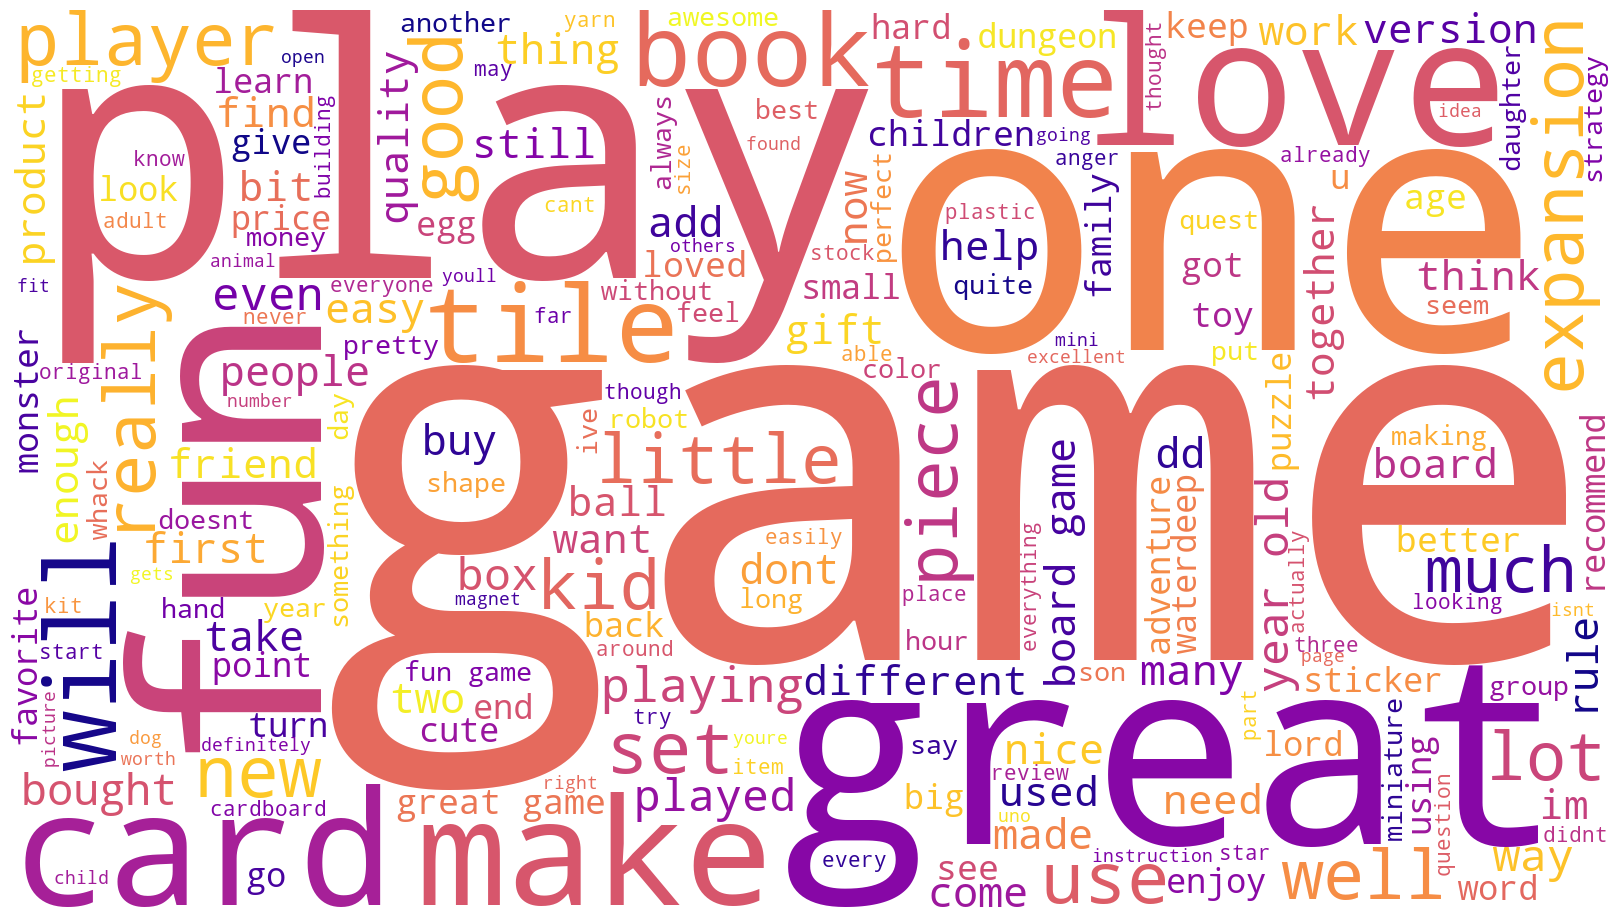

In [91]:
# Create a wordcloud without stop words for review.

wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review_tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

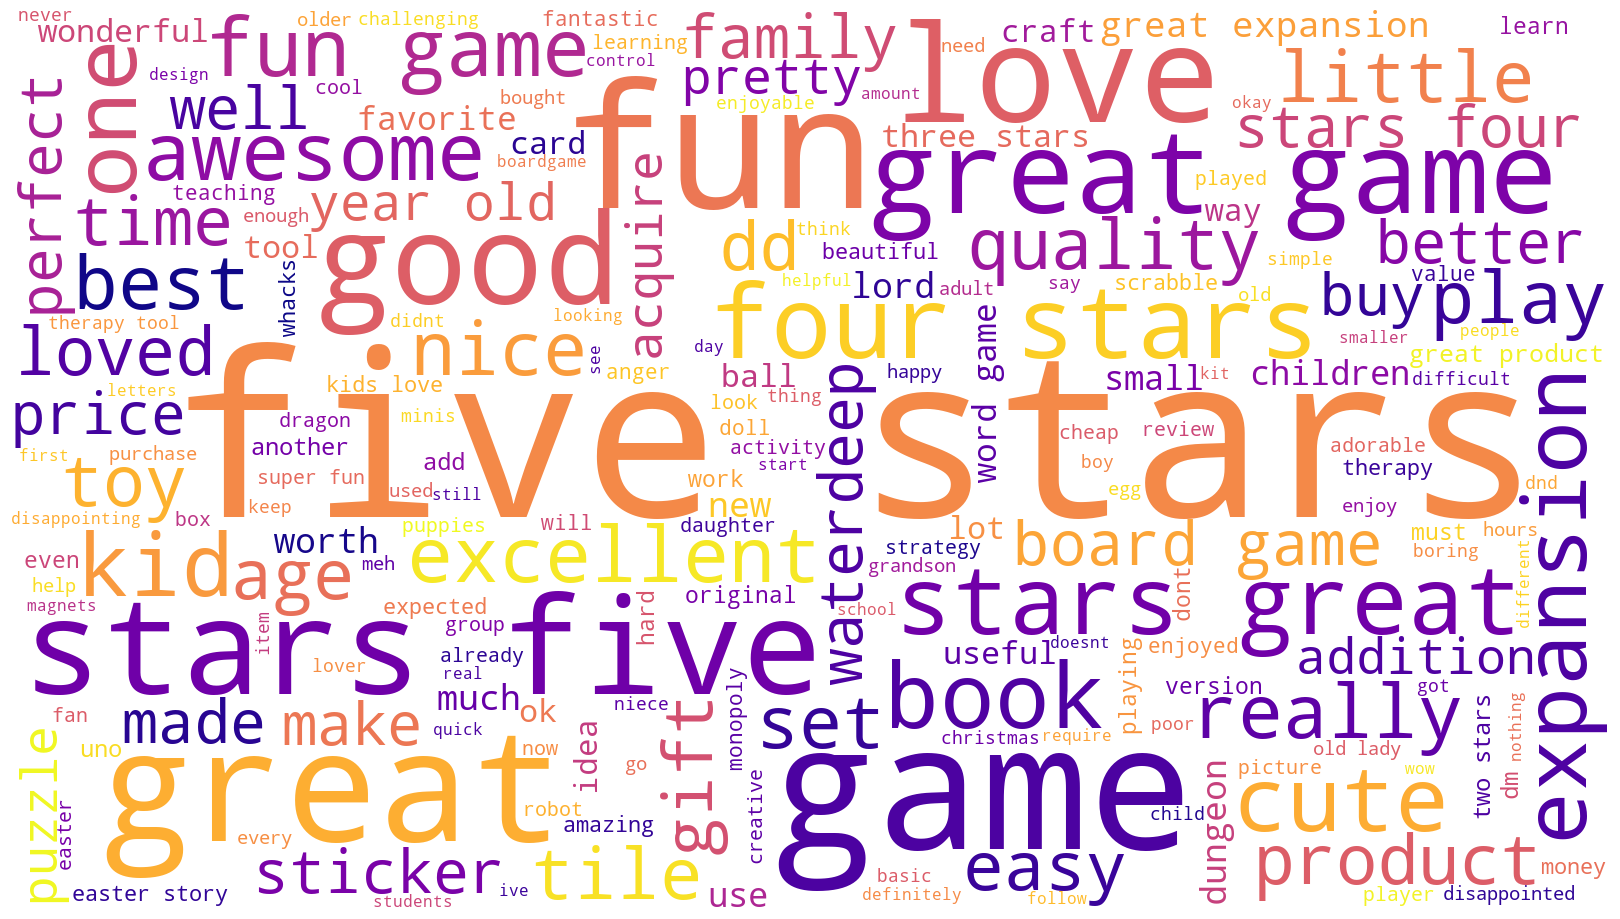

In [92]:
# Create a wordcloud without stop words for summary.

wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary_tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### Identify 15 most common words and polarity

In [93]:
# Determine the 15 most common words in review.

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(review_tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

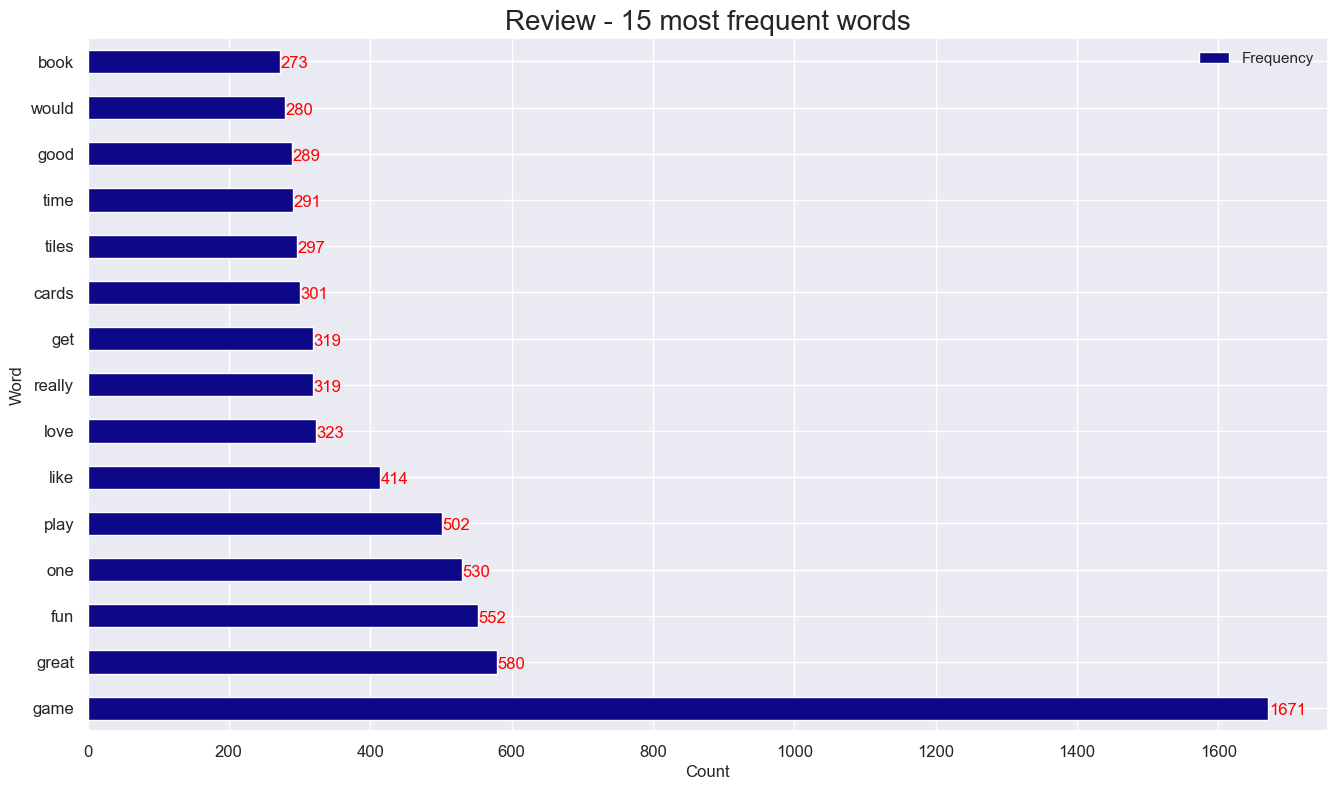

In [94]:
# Set the plot type.
ax = counts_review.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')
sns.set_theme(style="white", rc={"axes.grid": False})

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review - 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [95]:
# Determine the 15 most common words in summary.

# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(summary_tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary


Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

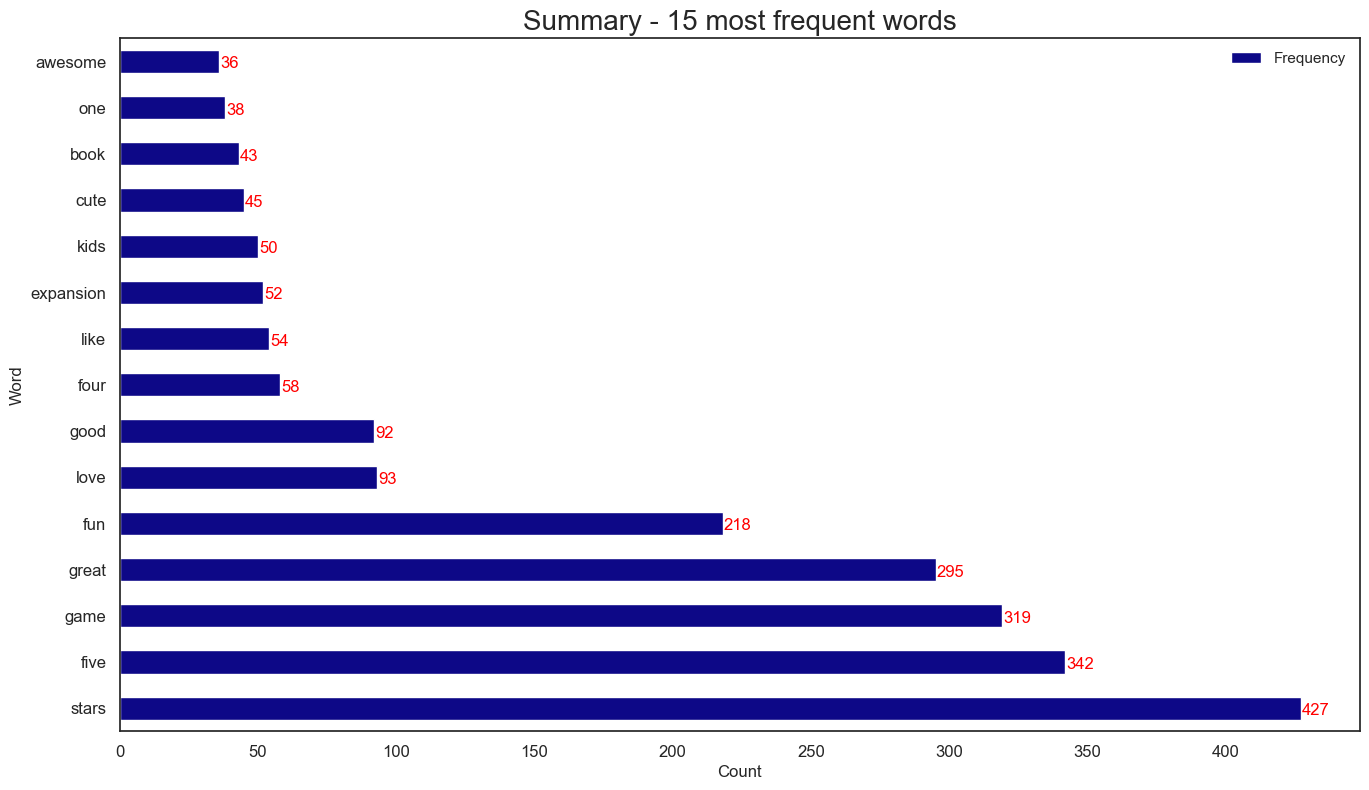

In [96]:
# Set the plot type.
ax = counts_summary.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')
sns.set_theme(style="white", rc={"axes.grid": False})

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summary - 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 3.4 Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [97]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [98]:
# Determine polarity of both columns. 

# Populate a new column with polarity scores for each review and summary.

df4['review_polarity'] = df4['review'].apply(generate_polarity)
df4['summary_polarity'] = df4['summary'].apply(generate_polarity)

# Preview the result.

print(df4['review_polarity'].head())
print(df4['summary_polarity'].head())

review_polarity_desc = pd.DataFrame(df4['review_polarity'].describe())
summary_polarity_desc = pd.DataFrame(df4['summary_polarity'].describe())
desc_polarity = pd.concat([review_polarity_desc, summary_polarity_desc], axis=1)
desc_polarity.columns = ['review_polarity', 'summary_polarity']

desc_polarity

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: review_polarity, dtype: float64
0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary_polarity, dtype: float64


review_polarity  summary_polarity
count      1961.000000       1961.000000
mean          0.213170          0.223678
std           0.260360          0.337507
min          -1.000000         -1.000000
25%           0.045833          0.000000
50%           0.177222          0.100000
75%           0.351562          0.475000
max           1.000000          1.000000

In [99]:
# Determine subjectivity of both columns.

def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each review and summary.

df4['review_subjectivity'] = df4['review'].apply(generate_subjectivity)
df4['summary_subjectivity'] = df4['summary'].apply(generate_subjectivity)

# Preview the result.

print(df4['review_subjectivity'].head())
print(df4['summary_subjectivity'].head())

review_subjectivity_desc = pd.DataFrame(df4['review_subjectivity'].describe())
summary_subjectivity_desc = pd.DataFrame(df4['summary_subjectivity'].describe())
desc_subjectivity = pd.concat([review_subjectivity_desc, summary_subjectivity_desc], axis=1)
desc_subjectivity.columns = ['review_subjectivity', 'summary_subjectivity']

desc_subjectivity

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: review_subjectivity, dtype: float64
0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: summary_subjectivity, dtype: float64


review_subjectivity  summary_subjectivity
count          1961.000000           1961.000000
mean              0.516741              0.385615
std               0.192895              0.340746
min               0.000000              0.000000
25%               0.423637              0.000000
50%               0.508333              0.400000
75%               0.604286              0.650000
max               1.000000              1.000000

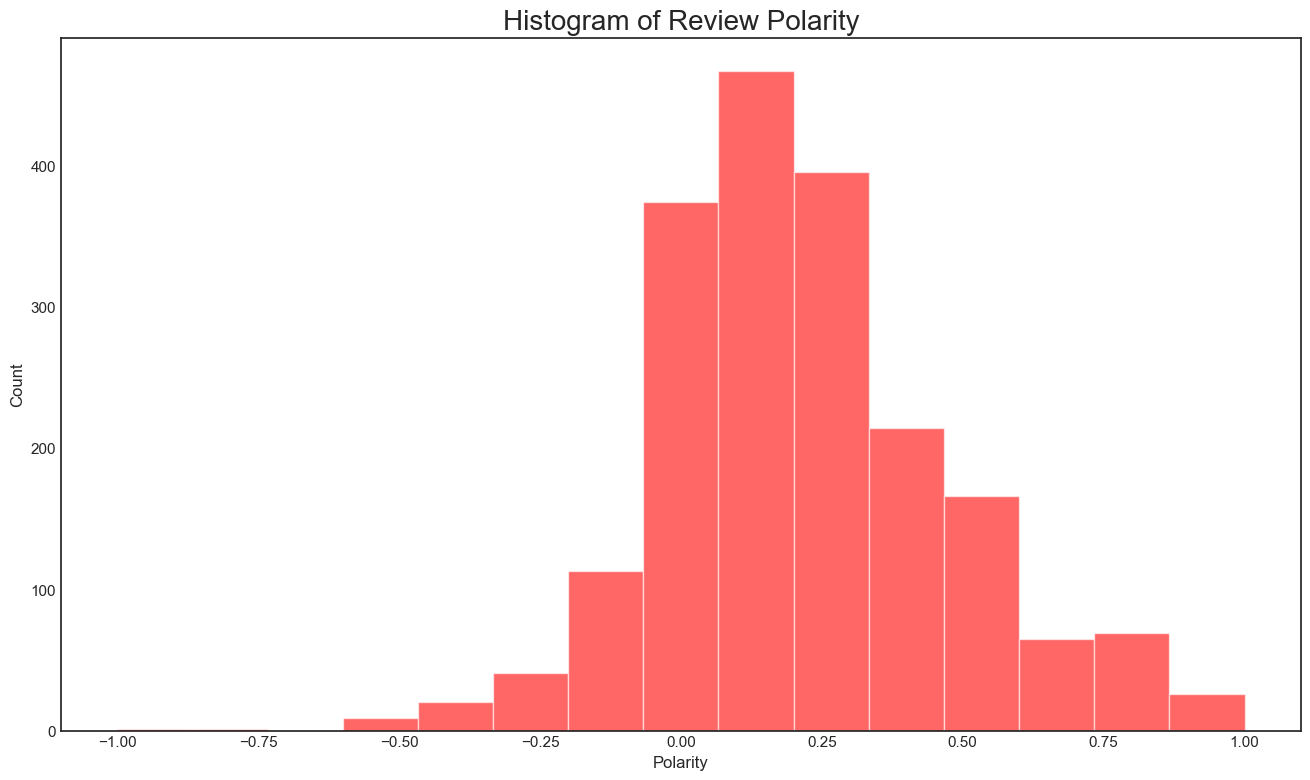

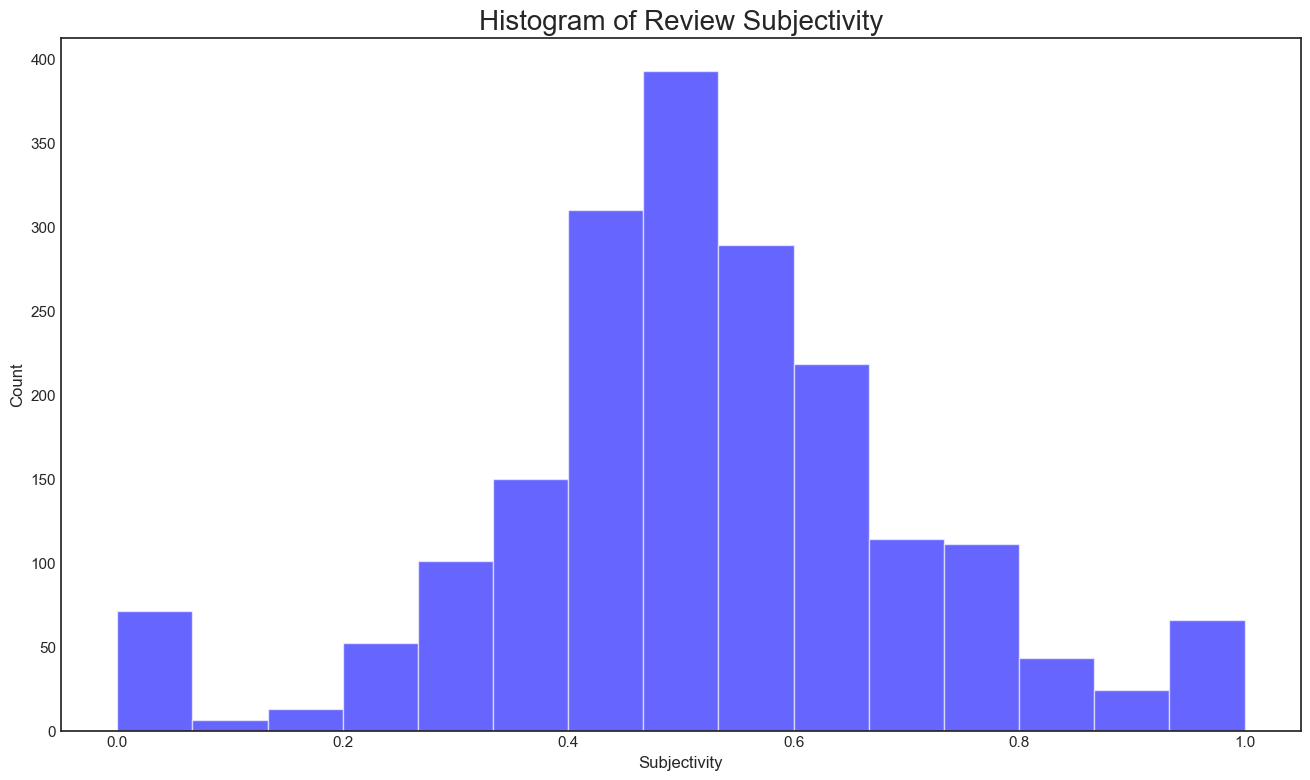

In [100]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))
plt.style.use('seaborn-white')

# Define the bars.
n, bins, patches = plt.hist(df4['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Review Polarity', fontsize=20)

plt.show()


# Histogram of sentiment (subjectivity?) score

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['review_subjectivity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Review Subjectivity', fontsize=20)
plt.show()

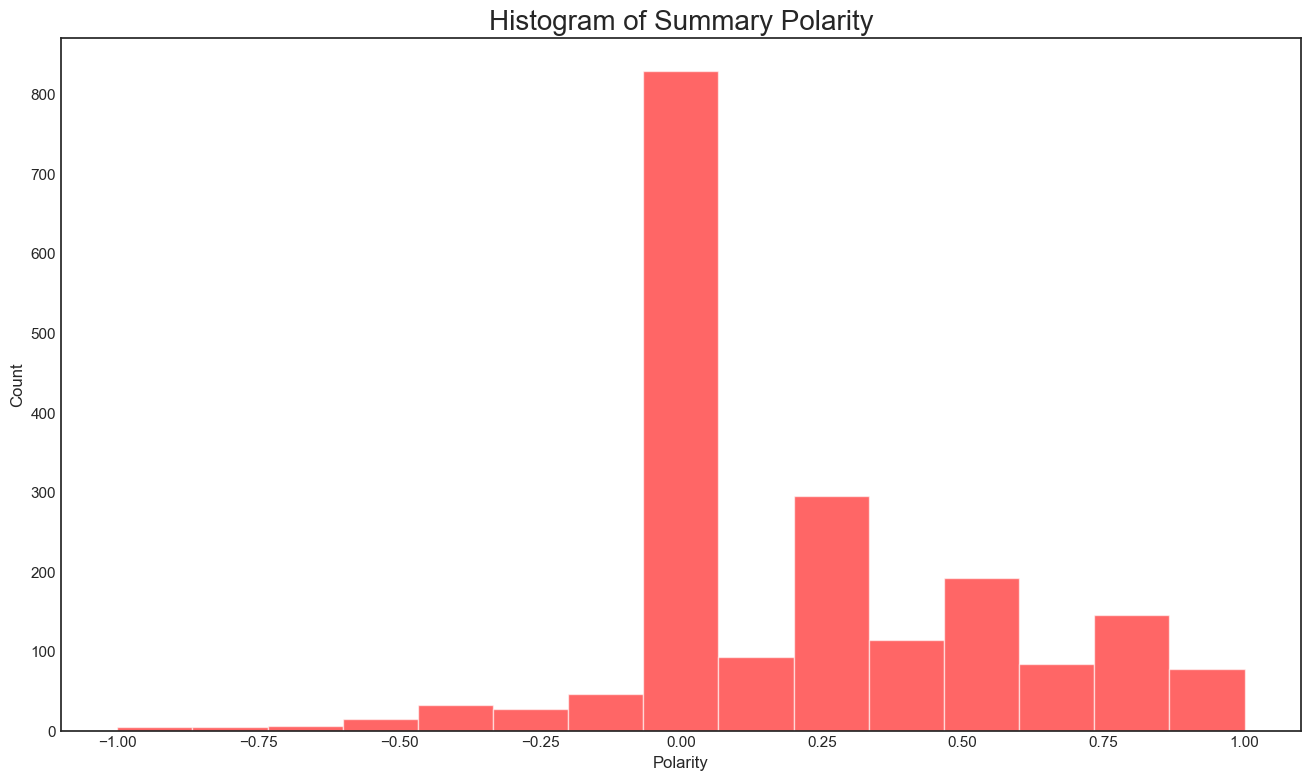

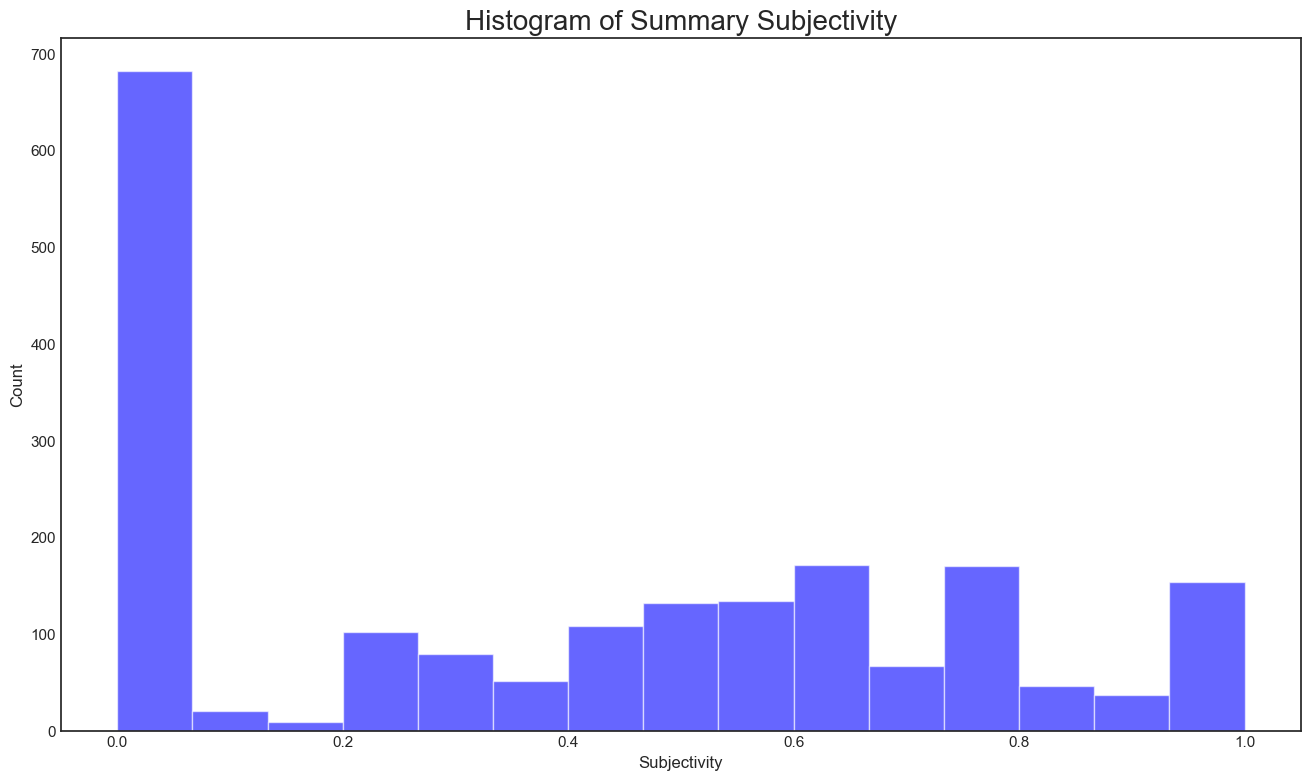

In [101]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))
plt.style.use('seaborn-white')

# Define the bars.
n, bins, patches = plt.hist(df4['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Summary Polarity', fontsize=20)

plt.show()


# Histogram of sentiment (subjectivity?) score

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['summary_subjectivity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Summary Subjectivity', fontsize=20)
plt.show()

## 3.5 Identify top 20 positive and negative reviews and summaries respectively

In [102]:
# Top 20 negative reviews.

# Create a DataFrame.
review_negative_sentiment = df4.nsmallest(20, 'review_polarity')

# Eliminate unnecessary columns.
review_negative_sentiment = review_negative_sentiment[['review', 'review_polarity', 'review_subjectivity']]

# Adjust the column width.
review_negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.


In [103]:
# Top 20 negative summaries.

# Create a DataFrame.
summary_negative_sentiment = df4.nsmallest(20, 'summary_polarity')

# Eliminate unnecessary columns.
summary_negative_sentiment = summary_negative_sentiment[['summary', 'summary_polarity', 'summary_subjectivity']]

# Adjust the column width.
summary_negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.

In [104]:
# Top 20 positive reviews.

# Create a DataFrame.
review_positive_sentiment = df4.nlargest(20, 'review_polarity')

# Eliminate unnecessary columns.
review_positive_sentiment = review_positive_sentiment[['review', 'review_polarity', 'review_subjectivity']]

# Adjust the column width.
review_positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.


In [105]:
# Top 20 positive summaries.

# Create a DataFrame.
summary_positive_sentiment = df4.nlargest(20, 'summary_polarity')

# Eliminate unnecessary columns.
summary_positive_sentiment = summary_positive_sentiment[['summary', 'summary_polarity', 'summary_subjectivity']]

# Adjust the column width.
summary_positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.

## Insights and observations

### Polarity

- The dataset contains a broad spectrum of sentiment, ranging from extremely negative to extremely positive, with an overall positive average sentiment.
- Summaries are in the main more positive.
- Summaries tend to exhibit a wider range of sentiment compared to reviews, as indicated by the higher standard deviation and more positively skewed upper quartile, despite having a slightly more positive mean sentiment. This could be due to the summarization process itself, where there's an attempt to encapsulate the essence of the review, leading to more pronounced sentiments 
- The presence of extreme values (both -1 and 1) highlights the diversity in perceptions and experiences among the respondents.

### Subjectivity

- Reviews tend to be more subjective on average than summaries, which aligns with the expectation that reviews would contain more personal opinions.
- Summaries show a wide range of subjectivity, indicated by a higher standard deviation, with a notable portion being completely objective. This suggests that while some summaries may aim to objectively present information, others incorporate subjective views.
- The presence of completely objective (score of 0) and completely subjective (score of 1) entries in both reviews and summaries highlights the diversity of content in terms of subjectivity/objectivity.

### Positive and Negative Comments

The model perceived positive and negative comments well. Negative reviews tended to have the most miscategorised comments.


### How can text data (e.g. social data such as customer reviews) be used to inform marketing campaigns and make improvements to the business?

- Text data from social media can provide a goldmine of insights.
- Sentiment Analysis: By applying the above methodology, Turtle Games can gauge the overall sentiment towards their brand, products and services. Both positive and negative sentiments can be leveraged to improve sales.
- Text Analysis: Can be used to identify trends and customer preferences. Content creation and targeted marketing strategies can be implemented to resonate with current trends. 
- Customer Segmentation: Customers can be segmented by preferences and sentiments.
- Specific feedback can be leveraged to help guide service improvements and product development.  
- Competitor Analysis: Turtle Games could implement the above analysis on competitors text data and gain insights into their competition and wider market landscape.

To effectively leverage text data, Turtle Games can employ natural language processing (NLP) techniques, like those used above for sentiment analysis and keyword extraction. 
Incorporating these insights into marketing campaigns and business strategies through a cross-functional approach, involving marketing, product development, customer service, and strategic planning teams, Turtle Games can ensure that they are not only responsive to customer needs but also proactive in anticipating and shaping customer desires and market trends.


# 